<h1 align="center">Modelado Predictivo en el Conjunto de Datos Iris</h1>


Este notebook documenta el análisis exploratorio, la limpieza, la codificación de variables y el modelado predictivo usando el dataset clásico de Iris.

Incluye:
- Visualización de relaciones y outliers
- Codificación categórica
- Regresión Lineal Multivariada con descenso de gradiente
- Regresión Logística Multiclase con One-vs-Rest y descenso de gradiente.

## 1. Carga del Dataset

Cargamos el dataset `iris.data`, que contiene 150 muestras de flores clasificadas en tres especies. Cada muestra tiene cuatro características numéricas: largo y ancho del sépalo, y largo y ancho del pétalo.

In [1]:
import pandas as pd

columnas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', names=columnas)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Exploración y Limpieza de Datos

Se realiza una inspección del dataset para entender su estructura, verificar valores faltantes o duplicados y visualizar su distribución mediante diagramas de caja y gráficos de dispersión.

In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 3. Visualización de Datos

La visualización de datos es una parte clave del análisis exploratorio, ya que nos permite entender mejor la distribución, relación y comportamiento de las variables.Estas gráficas nos dan una primera impresión del comportamiento de los datos antes de aplicar modelos matemáticos, y nos ayudan a tomar decisiones sobre normalización, codificación o selección de variables.


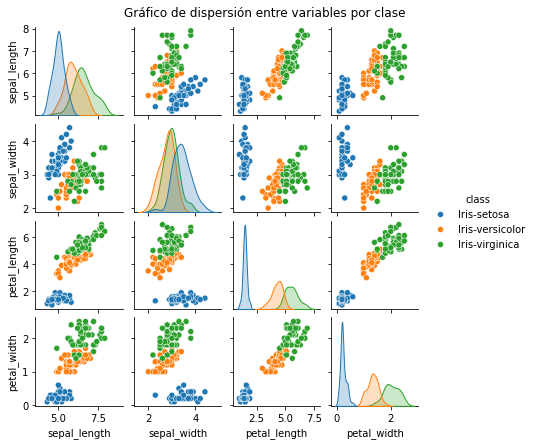

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(df, hue='class', height=1.5)
plt.suptitle("Gráfico de dispersión entre variables por clase", y=1.02)
plt.show()

### Conclusión
El gráfico muestra cómo se relacionan las características de las flores según su especie. Podemos ver que las flores de diferente clase tienen formas y tamaños distintos, especialmente en los pétalos. Esto permite diferenciarlas fácilmente y confirma que los datos son útiles para entrenar modelos de clasificación.

In [6]:
print("Duplicados encontrados:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicados encontrados: 3


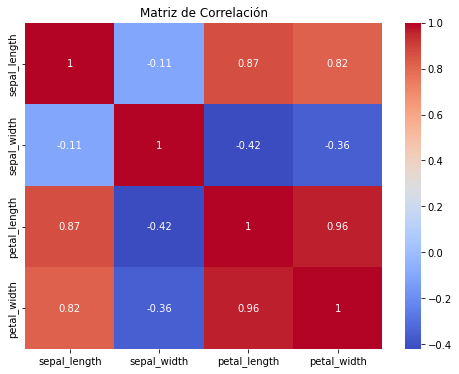

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()



### Conclusión 

La matriz nos muestra qué tan relacionadas están las variables numéricas entre sí. Podemos observar que `petal_length` y `petal_width` tienen una correlación muy alta (0.96), lo que indica que crecen juntas. En cambio, `sepal_width` tiene una correlación baja o negativa con otras variables, lo que sugiere que está menos relacionada.  
Esto nos ayuda a identificar qué variables aportan información similar y cuáles son más independientes para el análisis.


## 4. Codificación de Variables Categóricas

Convertimos la variable categórica `class` en una representación numérica (`class_label`) usando codificación con `LabelEncoder`, para permitir su uso en modelos matemáticos.

In [8]:
from sklearn.preprocessing import LabelEncoder

df['class_label'] = LabelEncoder().fit_transform(df['class'])
df[['class', 'class_label']].drop_duplicates()


,class,class_label
0,Iris-setosa,0
50,Iris-versicolor,1
100,Iris-virginica,2


## 5. División de Datos

Se divide el dataset en conjuntos de entrenamiento y prueba. Esto permite entrenar el modelo sobre un subconjunto de los datos y luego evaluar su rendimiento en datos no vistos.

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class','class_label'])
y = df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 6. Modelos Predictivos con Descenso de Gradiente

Se implementan dos modelos entrenados manualmente usando descenso de gradiente:

1. **Regresión Lineal Multivariada** para predecir la longitud del pétalo.
2. **Regresión Logística Multiclase (One-vs-Rest)** para clasificar la especie de flor.

### • Regresión Lineal Multivariada
Implementamos el algoritmo de **descenso de gradiente** para ajustar los parámetros de un modelo de regresión lineal multivariada. 

#### Fórmula de Predicción Lineal
$$
\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

La función de pérdida que se utilizará es el **error cuadrático medio** (MSE):

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

Donde $h_\theta(x) = X \theta$. La actualización de parámetros se realiza mediante:

$$
\theta := \theta - \alpha \frac{1}{m} X^T (X \theta - y)
$$

A continuación, se muestra la implementación y la evolución gráfica del error por épocas.


In [10]:
X = df[['sepal_length', 'sepal_width', 'petal_width']]
y = df['petal_length'].values.reshape(-1, 1)
X_norm = (X - X.mean()) / X.std()
X_norm.insert(0, 'bias', 1)
X_np = X_norm.values
y_np = y

theta = np.zeros((X_np.shape[1], 1))
alpha = 0.01
epochs = 1000
m = len(y_np)
cost_history = []

for _ in range(epochs):
    predictions = X_np @ theta
    errors = predictions - y_np
    gradient = (1 / m) * X_np.T @ errors
    theta -= alpha * gradient
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    cost_history.append(cost)

print(f"Costo final: {cost:.4f}")


Costo final: 0.0506


#### Conclusión:

El modelo mostró una buena capacidad de aprendizaje al reducir progresivamente el error durante el entrenamiento.  
Un costo final bajo indica que las predicciones se ajustan bien a los valores reales. Este comportamiento es una señal de que el modelo ha convergido correctamente y es adecuado para tareas de predicción sobre estos datos.


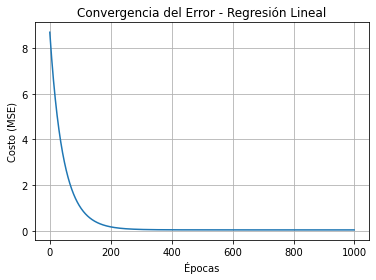

In [12]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.title("Convergencia del Error - Regresión Lineal")
plt.xlabel("Épocas")
plt.ylabel("Costo (MSE)")
plt.grid(True)
plt.show()

### • Regresión logística multiclase (One-vs-Rest)

Para clasificación multiclase usamos regresión logística con estrategia **One-vs-Rest**. Entrenamos un clasificador binario por cada clase. La función de pérdida utilizada es la **log loss**:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

donde:

$$
h_\theta(x) = \frac{1}{1 + e^{-x^T\theta}}
$$

A continuación, implementamos esta estrategia para el dataset de Iris.


In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss, accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Cargando datos
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# 2. One-hot encoding de las etiquetas
encoder = OneHotEncoder(sparse_output=False)
Y_encoded = encoder.fit_transform(y)

# 3. Estandarizando X
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# 4. Columna para el sesgo (bias)
X_b = np.c_[np.ones((X_std.shape[0], 1)), X_std]

# 5. Inicializando parámetros
m, n = X_b.shape
k = Y_encoded.shape[1]
Theta = np.random.randn(n, k) * 0.01  # pesos pequeños aleatorios
alpha = 0.1
epochs = 300
losses = []

# 6. Funciones de utilidad
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# 7. Entrenamiento
for epoch in range(epochs):
    scores = X_b @ Theta
    probs = softmax(scores)
    loss = log_loss(Y_encoded, probs)
    losses.append(loss)

    gradient = (1 / m) * X_b.T @ (probs - Y_encoded)
    Theta -= alpha * gradient

print(f"Última pérdida (log-loss): {loss:.4f}")

# 8. Predicción y evaluación
y_true = y.flatten()
y_pred_probs = softmax(X_b @ Theta)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Última pérdida (log-loss): 0.2215
Precisión del modelo: 94.00%


#### Conclusión:

El modelo presenta un rendimiento sólido, logrando una **pérdida logarítmica baja** y una **alta precisión** en las predicciones.  
Esto indica que logra diferenciar correctamente entre las clases del conjunto de datos, siendo confiable para tareas de clasificación similares. Una buena combinación de baja pérdida y alta precisión refleja un entrenamiento efectivo y bien ajustado.

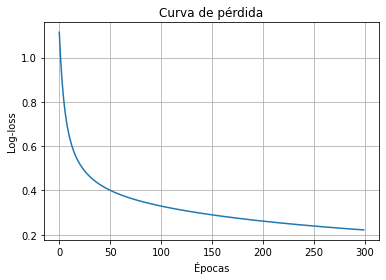

In [14]:
# visualización de la curva de pérdida
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Curva de pérdida")
plt.xlabel("Épocas")
plt.ylabel("Log-loss")
plt.grid(True)
plt.show()


### Método de Newton-Raphson multivariable (opcional)

El método de **Newton-Raphson** se puede utilizar como alternativa al descenso de gradiente para encontrar los parámetros óptimos de la regresión logística. Este método aprovecha la matriz Hessiana de la función de pérdida para acelerar la convergencia.

El paso de actualización es:

$$
\theta := \theta - H^{-1} \nabla J(\theta)
$$

Donde:
- $\nabla J(\theta)$ es el gradiente de la función de pérdida logística.
- $H$ es la matriz Hessiana, definida como:

$$
H = \frac{1}{m} X^T R X
$$

donde $R$ es una matriz diagonal con $h_\theta(x^{(i)})(1 - h_\theta(x^{(i)}))$ en su diagonal.


Última pérdida (log-loss): 0.0000
Precisión del modelo: 100.00%


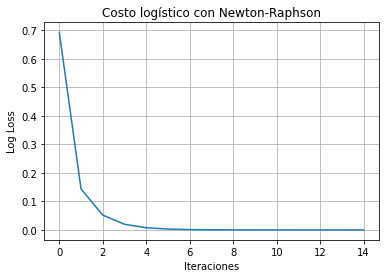

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import log_loss, accuracy_score

# Cargando dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Estandarizando
X_std = (X - X.mean(axis=0)) / X.std(axis=0)

# Agregar término de sesgo (bias)
X_b = np.c_[np.ones((X_std.shape[0], 1)), X_std]

# Seleccionar solo dos clases para clasificación binaria
binary_filter = (iris.target != 2)
X_bin = X_b[binary_filter]
y_bin = (iris.target[binary_filter] == 1).astype(int).reshape(-1, 1)

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Inicialización
theta_nr = np.zeros((X_bin.shape[1], 1))
eps = 1e-5
max_iter = 15
costs = []

# Entrenamiento con Newton-Raphson
for i in range(max_iter):
    z = X_bin @ theta_nr
    h = sigmoid(z)
    gradient = X_bin.T @ (h - y_bin)
    R = np.diag((h * (1 - h)).flatten())
    H = X_bin.T @ R @ X_bin

    # Resolver sistema lineal en lugar de invertir
    try:
        delta = np.linalg.solve(H, gradient)
    except np.linalg.LinAlgError:
        print("Matriz Hessiana no invertible")
        break

    theta_nr -= delta
    cost = log_loss(y_bin, h)
    costs.append(cost)

# Mostrar última pérdida
print(f"Última pérdida (log-loss): {cost:.4f}")

# Predicciones finales y precisión
y_pred = (h >= 0.5).astype(int)
accuracy = accuracy_score(y_bin, y_pred)
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Visualizar la curva de pérdida
plt.plot(costs)
plt.title("Costo logístico con Newton-Raphson")
plt.xlabel("Iteraciones")
plt.ylabel("Log Loss")
plt.grid(True)
plt.show()


## Comparación de Modelos Predictivos

| Método                              | Tipo de Problema       | Técnica Principal       | Métrica de Evaluación             | Ventajas                                                                 |
|-------------------------------------|-------------------------|--------------------------|-----------------------------------|--------------------------------------------------------------------------|
| **Regresión Lineal Multivariada**   | Predicción continua     | Descenso de Gradiente    | Error cuadrático medio (MSE)      | Buena aproximación a valores reales. Convergencia efectiva.              |
| **Regresión Logística Multiclase**  | Clasificación multiclase| One-vs-Rest + GD         | Log loss + Precisión              | Buena precisión. Capacidad de distinguir entre clases múltiples.         |
| **Newton-Raphson (opcional)**       | Clasificación multiclase| Newton-Raphson           | —                                 | Convergencia más rápida en teoría, pero más compleja de implementar.     |
